<a href="https://colab.research.google.com/github/rffaelgit/EBAC/blob/main/Analista_de_dados_M15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)}) # dimensões para o grafico
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds = data[['price', 'carat', 'clarity']] # colunas de interesse
diamonds= diamonds.query('price <= 8000' ) #faixa de valor onde as ocorrencias se concentram mais
diamonds.head()

,price,carat,clarity
0,326,0.23,SI2
1,326,0.21,SI1
2,327,0.23,VS1
3,334,0.29,VS2
4,335,0.31,SI2


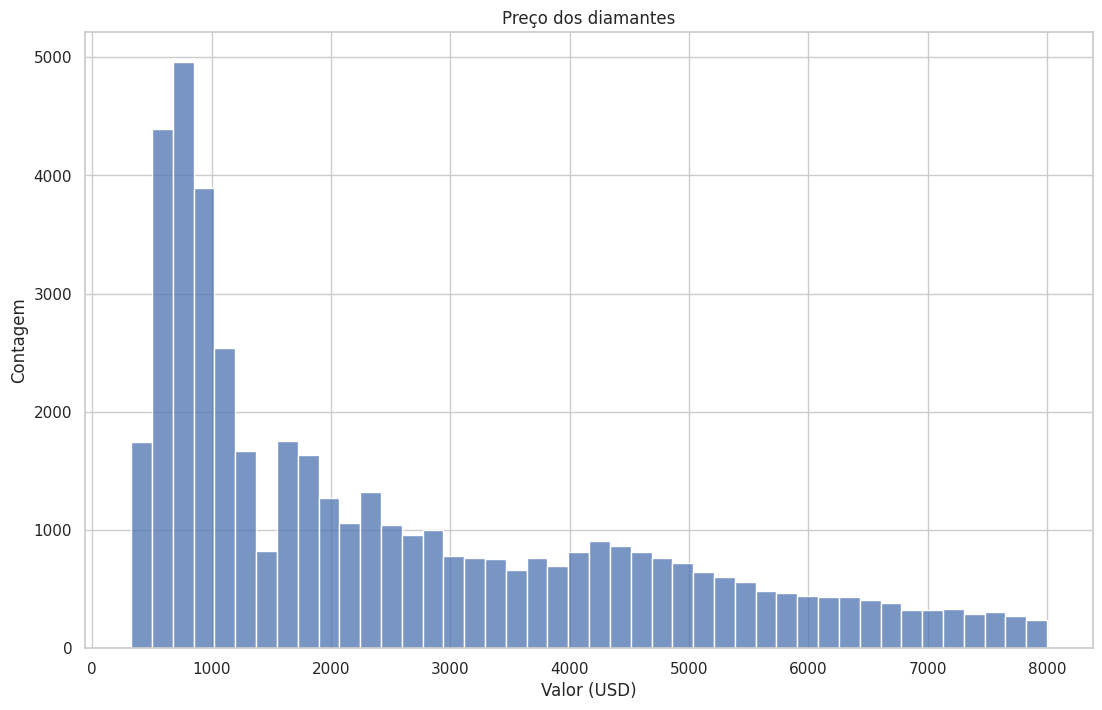

In [ ]:
# gráfico do exercício 1

with sns.axes_style('whitegrid'):
  graf_diamonds = sns.histplot(data=diamonds, x='price')
  graf_diamonds.set(title = 'Preço dos diamantes', xlabel = 'Valor (USD)', ylabel = 'Contagem')

**Insight do gráfico 1**: ...
Analisando o gráfico é possível observar que a partir do valor de 3.000 a quantidade de diamantes tende a diminuir. Há uma concentração de ocorrências, também nessa faixa de valor até 2.000 , com alguns picos na quantidade de diamntes até 1.000. A partir 7.000, a curva diminui de forma acentuada são os diamantes mais caaros, porém os mais raros de serem encontrados, motivo pelo qual são disputados no mercado.  

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [ ]:
clarity = diamonds[['clarity','carat','price']].groupby('clarity').agg('mean').sort_values(by=['price']).reset_index()

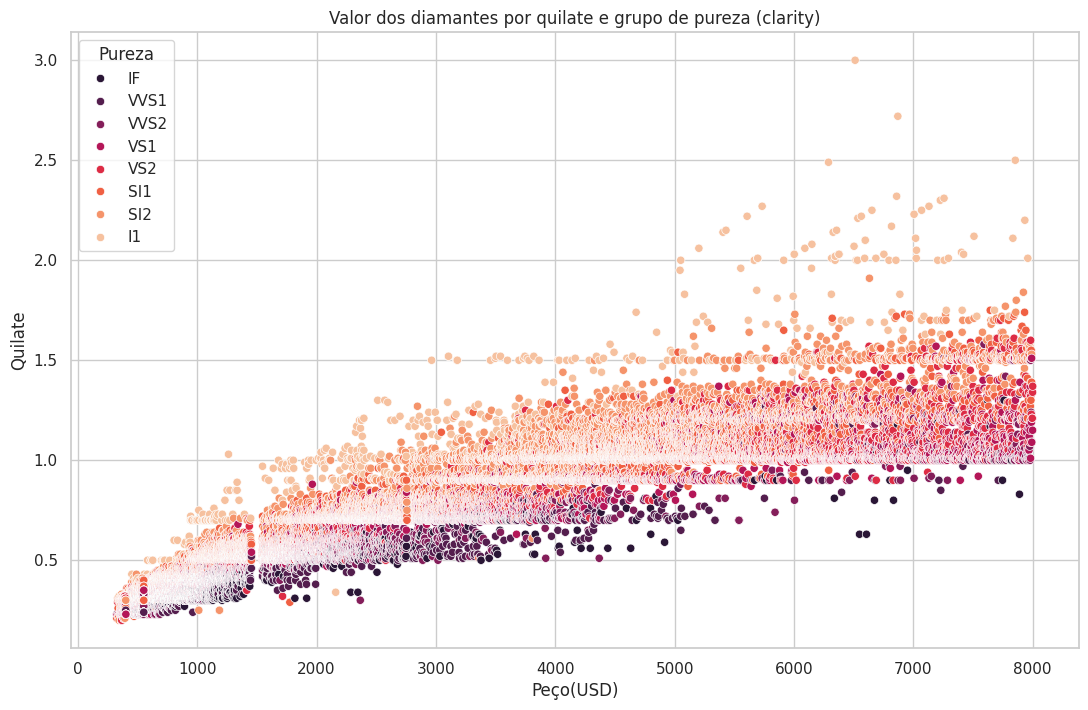

In [ ]:
# gráfico do exercício 2
with sns.axes_style ('whitegrid' ):
  graf_diamonds = sns.scatterplot (data= diamonds, x='price' , y='carat' , hue='clarity', palette ='rocket' )
  graf_diamonds.set(title='Valor dos diamantes por quilate e grupo de pureza (clarity)' , xlabel='Peço(USD)', ylabel='Quilate')

  graf_diamonds.get_legend ().set_title ('Pureza')

**Insight do gráfico 2**: ...
Analisando o gráfico2 de disperção, é possível analisar que a maoir concentração com relação ao quilate está na faixa do 1.0 a 1.5, dentro dessa faixa encontram-se os diamantes memos valorizados com relação a pureza, que seriam os tês últimos grupos SI1, SI2 e I1, por outro lado o fato de possuírem um maior indice de quilate, acaba agregando valor comerciasl a esses grupos, que são mais recorrentes na natureza, logo possuem uma maior média de preços. Tão raros quanto valiosos são os diamantes dos dois primmeiros grupos de pureza, mais raros ainda, diamentes desse crupo com quilate a cima de 1.0. Conclui-se que o principal fator no que poderá influenciar o faturamento de empresas do ramo é a a apostar na comercialização de ddiamentes de com maior quilate.

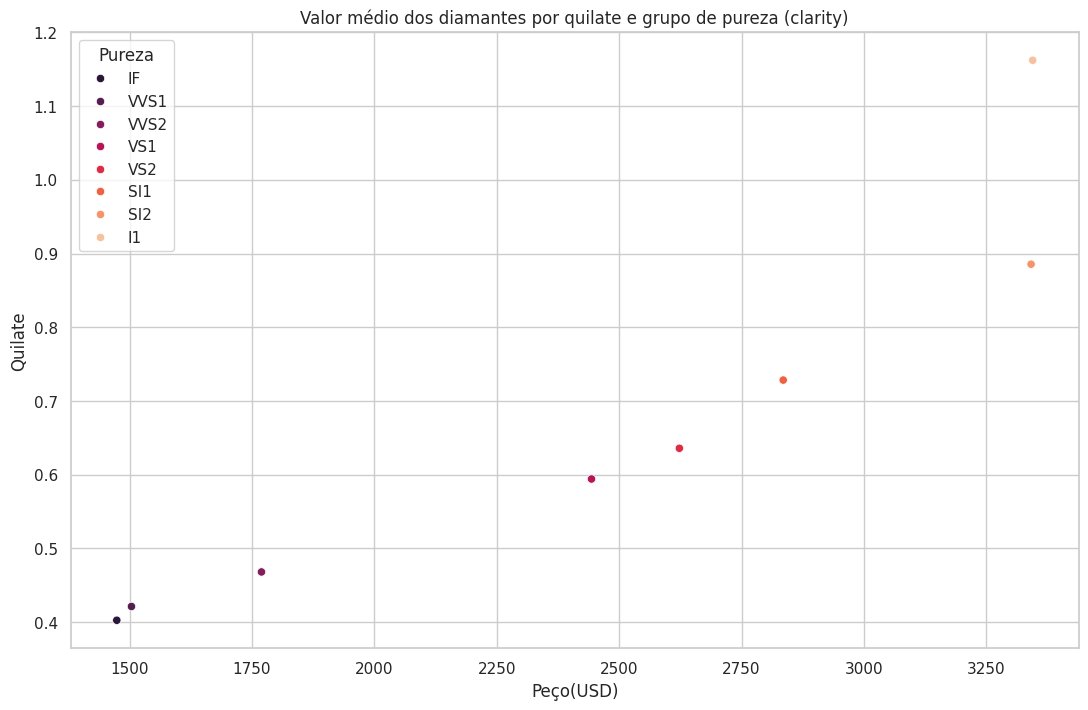

In [ ]:
# gráfico2.1 do exercício  (Media)
with sns.axes_style ('whitegrid' ):
  graf_diamonds = sns.scatterplot (data= clarity, x='price' , y='carat' , hue='clarity', palette ='rocket' )
  graf_diamonds.set(title='Valor médio dos diamantes por quilate e grupo de pureza (clarity)' , xlabel='Peço(USD)', ylabel='Quilate')

  graf_diamonds.get_legend ().set_title ('Pureza')

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [ ]:
import seaborn as sns

data = sns.load_dataset("mpg")


In [ ]:
data=data.sort_values(by=['model_year'],ascending=True, ignore_index= True)
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,112.0,88.0,2640,18.6,82,usa,chevrolet cavalier wagon
394,28.0,4,112.0,88.0,2605,19.6,82,usa,chevrolet cavalier
395,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
396,36.0,4,107.0,75.0,2205,14.5,82,japan,honda accord
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


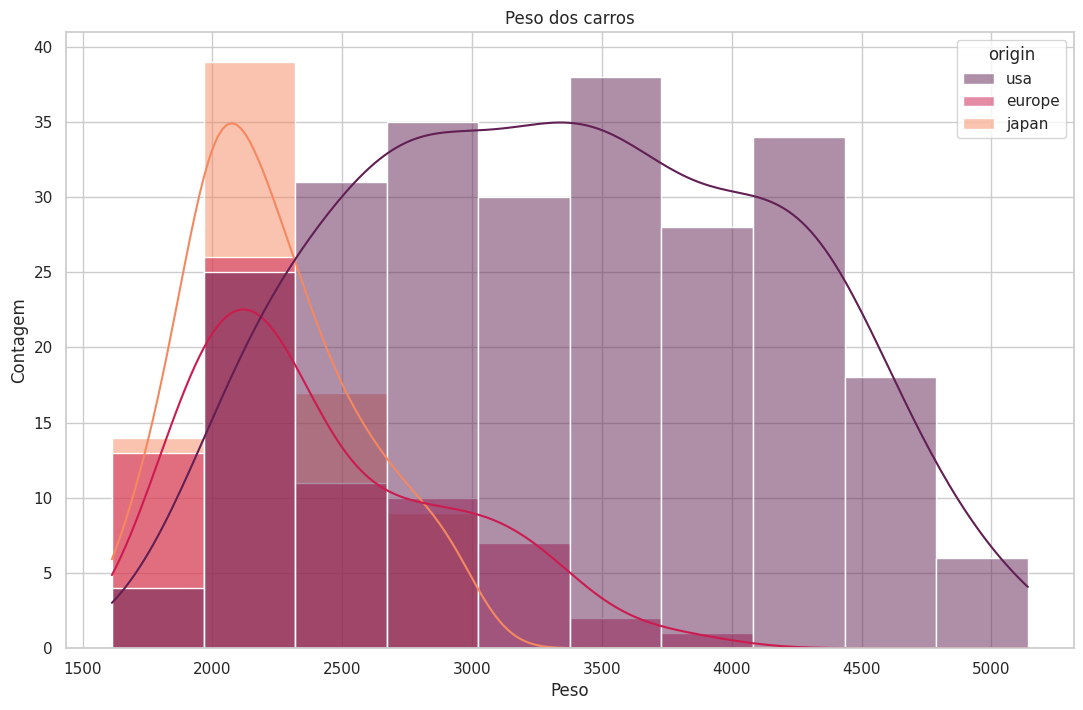

In [ ]:
# gráfico do exercício 3
with sns.axes_style ('whitegrid' ):
  graf_cars = sns.histplot (data=data , x='weight', hue = 'origin', kde=True, palette = 'rocket')
  graf_cars.set(title='Peso dos carros' , xlabel='Peso' , ylabel='Contagem' )


**Insight do gráfico 3**: ...
Analisando os gráfico3 é possível observar que o peso dos veículos foi reduzindo ao longdurante os anos. Quando analisados as origem dos modelos, os carros americanos tem um tendeência de serem mais pesados, carros europeus e japoneses estão mais ou menos dentro de uma mesma curva na média de peso.   

---